In [161]:
# develop vortex centring
# import math
import numpy as np
from matplotlib import pyplot as plt
# from matplotlib import cm
# import pandas as pd
import importlib
import wrftools as wrf
import genutils as gu
importlib.reload(wrf)

run='run_CTRL_rr'
flist=wrf.getflist(run)
fname=flist[24*12]
fname

'wrfout_d03_2007-09-13_00:00:00'

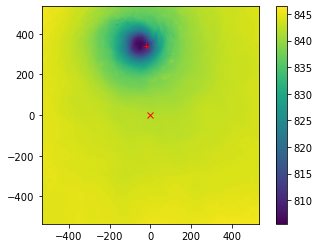

In [162]:
importlib.reload(wrf)
importlib.reload(gu)
(lon0,lat0)=wrf.getWRF(run,fname,'cc')
P=wrf.getWRF(run,fname,'P',z=10)
lon,lat=wrf.getCoords(wrf.wopath(run,fname),corners=True)
lon=lon/1000
lat=lat/1000
# plt.pcolormesh(lon,lat,P[:,:,10])

# fig,ax=plt.subplots(1,1)
im=gu.imshowxy(lon,lat,P.T)
plt.colorbar(im)
plt.plot(0,0,'rx')

# xmin,ymin=np.unravel_index(P.argmin(),P.shape)
plt.plot(lon[lon0],lat[lat0],'r+')


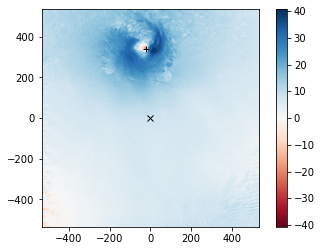

In [163]:
# u=wrf.getWRF(run,fname,'u',z=0)
# v=wrf.getWRF(run,fname,'v',z=0)
# ut,ur=wrf.cart2pol(u,v,lon0,lat0)

ut=wrf.getWRF(run,fname,'vt')

im=gu.imshowxy(lon,lat,ut.T,cmap=plt.get_cmap('RdBu'))
plt.colorbar(im)
plt.plot(0,0,'kx')

# xmin,ymin=np.unravel_index(P.argmin(),P.shape)
plt.plot(lon[xmin],lat[ymin],'k+')
plt.clim((-np.max(np.abs(ut)),np.max(np.abs(ut))))

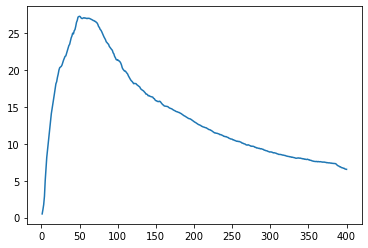

In [164]:
importlib.reload(wrf)
vtaz,rbins=wrf.azimAv(ut,lon0,lat0)
plt.plot(rbins,vtaz)